This dataset contains annual spending on product categories (e.g., fresh, milk, grocery) for 440 wholesale customers. Since no target labels exist, K-Means will group customers into clusters based on spending patterns

# Step 1: Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset (download from https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv" 
df = pd.read_csv(url)

# Display first 5 rows
print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


# Step 2: Preprocess Data

In [ ]:
Remove Irrelevant Columns :
Channel and Region are categorical and not used for clustering.

Standardize Features :
Scale data to mean=0 and variance=1 for K-Means sensitivity to scale.

In [3]:
# Drop non-spending columns
X = df.drop(["Channel", "Region"], axis=1)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Use Elbow Method to Choose Optimal K

In [5]:
# Calculate WCSS for K=1 to 10
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

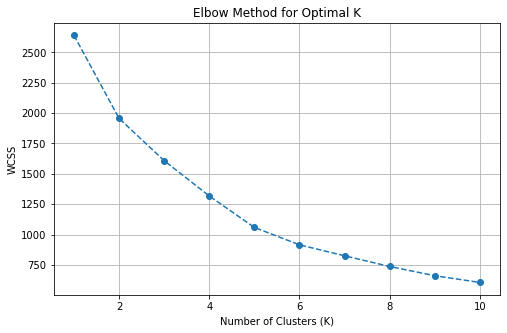

In [6]:
# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.grid()
plt.show()

In [ ]:
The elbow point at K=4 suggests 4 clusters

# Step 4: Train K-Means with K=4

In [7]:
# Train K-Means
kmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Step 5: Visualize Clusters in 2D Using PCA

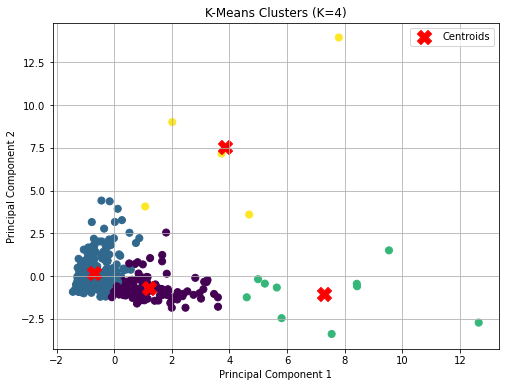

In [8]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#PCA reduces dimensionality while preserving as much variance as possible.


# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", s=50)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], 
            pca.transform(kmeans.cluster_centers_)[:, 1], 
            c="red", s=200, marker="X", label="Centroids")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters (K=4)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Step 6: Interpret Clusters
Add cluster labels back to the original dataset for interpretation:

In [9]:
# Add cluster labels to dataframe
df["Cluster"] = labels

# Group by cluster and calculate mean spending
cluster_means = df.groupby("Cluster").mean()
print(cluster_means)

          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.845455  2.554545   5591.436364  10113.027273  15637.390909   
1        1.120635  2.536508  13504.987302   3044.539683   3844.444444   
2        2.000000  2.500000  15964.900000  34708.500000  48536.900000   
3        1.200000  2.800000  50270.600000  26361.800000  16416.000000   

               Frozen  Detergents_Paper    Delicassen  
Cluster                                                
0         1499.918182       6711.354545   1759.090909  
1         3271.425397        852.320635   1127.107937  
2         3054.600000      24875.200000   2942.800000  
3        25122.800000       2475.000000  18595.200000  


In [ ]:
Interpretation :

Cluster 0 : High spending on Fresh products (e.g., restaurants).
Cluster 1 : High spending on Milk and Grocery (e.g., grocery stores).
Cluster 2 : Low spending across all categories (e.g., small retailers).
Cluster 3 : Moderate spenders with emphasis on Frozen and Delicatessen